In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My Drive/2017_food_posoning_regression/

Mounted at /content/drive
/content/drive/My Drive/2017_food_posoning_regression


In [ ]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

from pickle import dump
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler, PolynomialFeatures


from tensorflow.keras.layers import Embedding, Dense, Dropout, SimpleRNN, LSTM, GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
label_list = ['병원성 대장균', '살모넬라', '노로바이러스', '캠필로박터제주니', '클로스트리디움퍼프린젠스']
# label_list = ['살모넬라', '노로바이러스', '캠필로박터제주니', '클로스트리디움퍼프린젠스']
dir_list = ['./food_poisoning(17~21).csv', './weathre_data.csv']

In [ ]:
train_y_df = pd.read_csv(dir_list[0])
train_x_df = pd.read_csv(dir_list[1])

In [ ]:
train_y_df.drop(['date'], axis = 1, inplace = True)
train_x_df.drop(['date'], axis = 1, inplace = True)
# train_y_df.drop(['pathogenic E. coli'], axis = 1, inplace = True)

In [ ]:
def get_max_poisoning(train_y_df):
  result = []
  for idx in range(train_y_df.shape[0]):
    value = max(list(train_y_df.loc[idx]))
    result.append(list(train_y_df.loc[idx]).index(value))
  return pd.DataFrame(result) 

In [ ]:
result = get_max_poisoning(train_y_df)

In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(train_x_df, result, test_size = 0.7)

robust_scaler = RobustScaler()
robust_scaler.fit(x_train)

train_scaled = robust_scaler.transform(x_train)
valid_scaled = robust_scaler.transform(x_valid)

dump(robust_scaler, open('./robust_scaler.pkl', 'wb'))

In [ ]:
epoch, batch = 500, 16
units = train_x_df.shape[0]

model = Sequential()
# model.add(Dense(units, input_shape = [train_x_df.shape[1],], activation = 'relu'))
model.add(LSTM(units, input_shape = [train_x_df.shape[1],1], activation = 'relu'))
model.add(Dense(5, activation = 'softmax'))

es = EarlyStopping(monitor='val_loss', min_delta=0, patience=30, verbose=1, mode='auto')
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode = 'max', verbose = 1, save_best_only = True)

model.compile(optimizer = 'adam', loss ='sparse_categorical_crossentropy', metrics = ['acc'])
history = model.fit(train_scaled, y_train, callbacks = [es, mc], epochs = epoch, batch_size=batch, verbose = 0, validation_data = [valid_scaled, y_valid])


Epoch 1: val_acc improved from -inf to 0.57143, saving model to best_model.h5

Epoch 2: val_acc did not improve from 0.57143

Epoch 3: val_acc did not improve from 0.57143

Epoch 4: val_acc did not improve from 0.57143

Epoch 5: val_acc did not improve from 0.57143

Epoch 6: val_acc did not improve from 0.57143

Epoch 7: val_acc did not improve from 0.57143

Epoch 8: val_acc did not improve from 0.57143

Epoch 9: val_acc did not improve from 0.57143

Epoch 10: val_acc did not improve from 0.57143

Epoch 11: val_acc did not improve from 0.57143

Epoch 12: val_acc did not improve from 0.57143

Epoch 13: val_acc did not improve from 0.57143

Epoch 14: val_acc did not improve from 0.57143

Epoch 15: val_acc did not improve from 0.57143

Epoch 16: val_acc did not improve from 0.57143

Epoch 17: val_acc did not improve from 0.57143

Epoch 18: val_acc did not improve from 0.57143

Epoch 19: val_acc did not improve from 0.57143

Epoch 20: val_acc did not improve from 0.57143

Epoch 21: val_ac

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 60)                420       
                                                                 
 dense_1 (Dense)             (None, 5)                 305       
                                                                 
Total params: 725
Trainable params: 725
Non-trainable params: 0
_________________________________________________________________


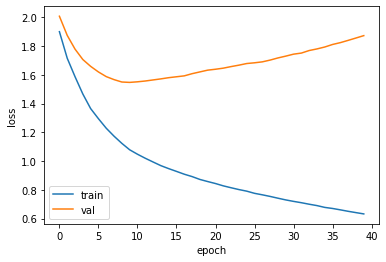

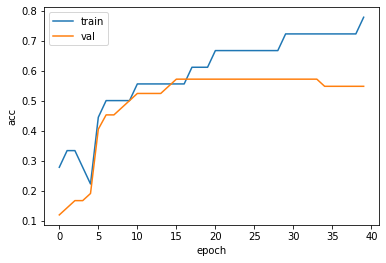

In [ ]:
def draw(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])

  plt.xlabel('epoch')
  plt.ylabel('loss')

  plt.legend(['train', 'val'])
  plt.show()

  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])

  plt.xlabel('epoch')
  plt.ylabel('acc')

  plt.legend(['train', 'val'])
  plt.show()
draw(history)

In [ ]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % loaded_model.evaluate(valid_scaled, y_valid)[1])

2/2 [==============================] - 0s 7ms/step - loss: 1.0832 - acc: 0.5476

 테스트 정확도: 0.5476
